The data given is of baseball and other criteria's to win the match, so we need to predcit the win, by using the data, 
as we can see the target data is continuous we are going to use linear regression in the further part of the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
bl=pd.read_csv('Baseball_score.csv')
bl.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
bl.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

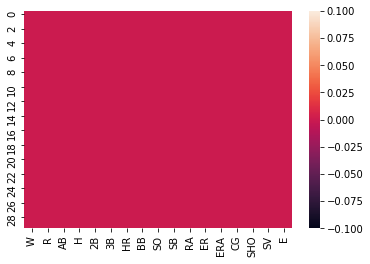

In [4]:
sns.heatmap(bl.isnull())

In [5]:
bl.corr().head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754


In [6]:
bl.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


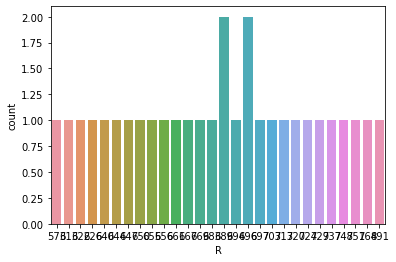

In [7]:
sns.countplot(x='R', data=bl)

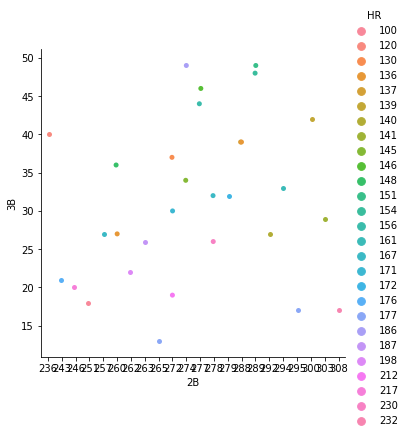

In [8]:
sns.catplot(x='2B', y='3B', hue='HR', data=bl)

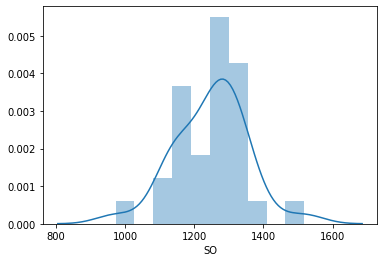

In [9]:
sns.distplot(bl.SO, bins=10)

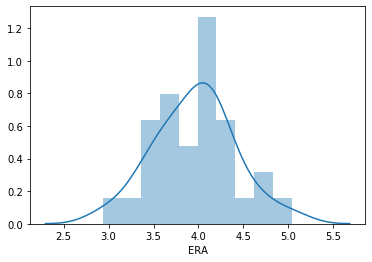

In [10]:
sns.distplot(bl.ERA, bins=10)

In [11]:
bl.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

(array([1., 3., 8., 8., 5., 3., 1., 0., 0., 1.]),
 array([573. , 604.8, 636.6, 668.4, 700.2, 732. , 763.8, 795.6, 827.4,
        859.2, 891. ]),
 <a list of 10 Patch objects>)

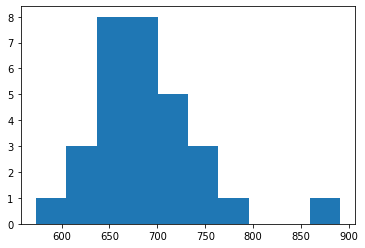

In [12]:
plt.hist(bl.R, bins=10)

(array([10.,  4.,  3.,  2.,  3.,  3.,  4.,  0.,  0.,  1.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

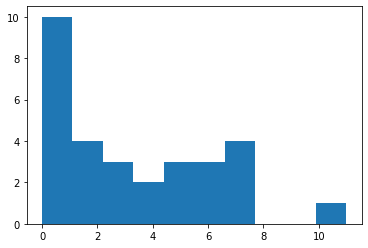

In [13]:
plt.hist(bl.CG, bins=10)

(array([4., 2., 2., 3., 4., 6., 3., 0., 2., 4.]),
 array([375. , 394.5, 414. , 433.5, 453. , 472.5, 492. , 511.5, 531. ,
        550.5, 570. ]),
 <a list of 10 Patch objects>)

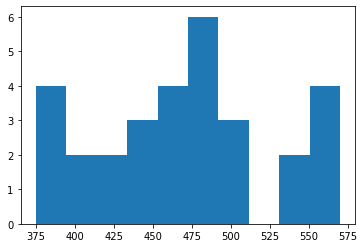

In [14]:
plt.hist(bl.BB, bins=10)

In [15]:
bs=bl.copy()

In [16]:
bs.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [17]:
bs['R']=np.log1p(bs['R'])
bs['SV']=np.log1p(bs['SV'])
bs['E']=np.log1p(bs['E'])
bs['CG']=np.log1p(bs['CG'])

In [18]:
bs.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO    0.565790
SV     0.163057
E      0.632916
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xc75ed88>,
 'caps': [<matplotlib.lines.Line2D at 0xc762d48>,
 'boxes': [<matplotlib.lines.Line2D at 0xc75e288>],
 'medians': [<matplotlib.lines.Line2D at 0xc765cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0xc765dc8>],
 'means': []}

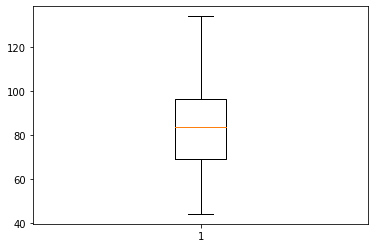

In [19]:
plt.boxplot(bs.SB)

{'whiskers': [<matplotlib.lines.Line2D at 0xc7c36c8>,
 'caps': [<matplotlib.lines.Line2D at 0xc7c3f88>,
 'boxes': [<matplotlib.lines.Line2D at 0xc7c0bc8>],
 'medians': [<matplotlib.lines.Line2D at 0xc7c6f08>],
 'fliers': [<matplotlib.lines.Line2D at 0xc7ccd88>],
 'means': []}

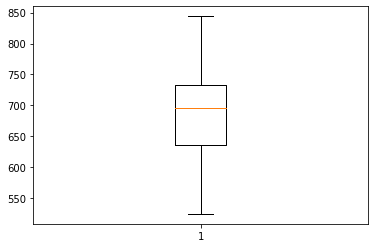

In [20]:
plt.boxplot(bs.RA)

{'whiskers': [<matplotlib.lines.Line2D at 0xc82ca88>,
 'caps': [<matplotlib.lines.Line2D at 0xc830a48>,
 'boxes': [<matplotlib.lines.Line2D at 0xc828f88>],
 'medians': [<matplotlib.lines.Line2D at 0xc8349c8>],
 'fliers': [<matplotlib.lines.Line2D at 0xc834ac8>],
 'means': []}

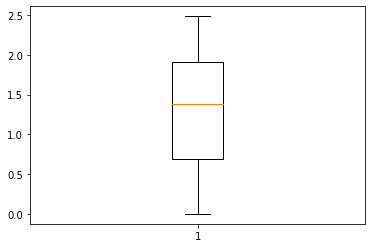

In [21]:
plt.boxplot(bs.CG)

{'whiskers': [<matplotlib.lines.Line2D at 0xc896408>,
 'caps': [<matplotlib.lines.Line2D at 0xc896cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0xc8919c8>],
 'medians': [<matplotlib.lines.Line2D at 0xc89ac48>],
 'fliers': [<matplotlib.lines.Line2D at 0xc8a0ac8>],
 'means': []}

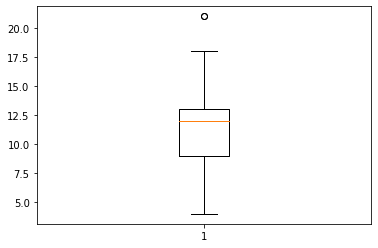

In [22]:
plt.boxplot(bs.SHO)

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(bs))
bb=bs[(z<3).all(axis=1)]

In [24]:
x=bb.drop('W', axis=1)
y=bb.iloc[:,0]

In [25]:
x.shape

(29, 16)

In [26]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for rstate in range(42,100):
    x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=rstate, test_size=0.2)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_yl=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred_yl)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value of final random state ', final_rstate, 'for max r2 score is', max_scr)

The corresponding value of final random state  80 for max r2 score is 0.7281980518140955


In [28]:
from sklearn.model_selection import cross_val_score
cross_val_scr=cross_val_score(lr, x,y, scoring='r2', cv = 10).mean()
cross_val_scr

-2.650018694014051

In [29]:
1/(1-max_scr) 

3.67914949349822

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
import warnings
warnings.filterwarnings('ignore')
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
0.39414271271923684
{'alpha': 1}
0.48320036509517805


In [31]:
rg=Ridge(alpha=1)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
pred_y=rg.predict(x_test)
r2_scrrg=r2_score(y_test,pred_y)
print('r2 score',r2_scrrg)
print(mean_squared_error(y_test,pred_y))

r2 score 0.27861249407264443
65.80035904727175


In [32]:
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_y=ls.predict(x_test)
r2_scrls=r2_score(y_test,pred_y)
print('r2 score',r2_scrls)
print(mean_squared_error(y_test,pred_y))

r2 score 0.003091238550171016
90.93164755666758


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000]}
grrb=GridSearchCV(gbr,parameters,cv=5)
grrb.fit(x,y)
grrb.best_params_

{'learning_rate': 0.001, 'n_estimators': 200}

In [34]:
gbr=GradientBoostingRegressor(learning_rate=0.001, n_estimators=200)
print('The cross Val Score',cross_val_score(gbr,x,y,cv=5, scoring='r2').mean())

The cross Val Score -0.30020705044460383


In [35]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000], 'base_estimator':[rg]}
grad=GridSearchCV(ada_reg,parameters,cv=5)
grad.fit(x,y)
grad.best_params_

{'base_estimator': Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
       random_state=None, solver='auto', tol=0.001),
 'learning_rate': 0.001,
 'n_estimators': 100}

In [36]:
gbra=AdaBoostRegressor(learning_rate=0.0001, n_estimators=200,base_estimator=rg)
print('The cross Val Score',cross_val_score(gbra,x,y,cv=10, scoring='r2').mean())

The cross Val Score -3.148012137976759


In [38]:
df1=pd.DataFrame(pred_yl)
df1.to_csv('Lr_prediction.csv')

In [40]:
from sklearn.externals import joblib
joblib.dump(lr,'lr_baseball.pkl')

['lr_baseball.pkl']

In [ ]:
In this model the cross_val_score is showing negative results, tried all the combinations with the x and y,
still showing the negative results indicationg underfitting of the values.
Therefore all in over considered the linear regression score the preferred one.